In [33]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import sys
import gzip
from Bio import SeqIO
import binascii

from PhicoreModules import parse_genbank, median, mean, stdev, mode
from PhicoreModules import get_features_of_type, get_features_lengths, get_gc_content, get_coding_density, get_distribution_of_stops # Przemek's functions
from PhicoreModules import get_mean_cds_length_rec_window, get_rolling_gc, get_rolling_mean_cds, get_rolling_deltas,get_rolling_count_cds, get_cds_count_length_rec_window # George's functions
from PhicoreModules import write_df_to_artemis

/Users/a1667917/miniforge3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       MZ130495.1    101130 bp    DNA             PHG\n'
  warnings.warn(
/Users/a1667917/miniforge3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(
/Users/a1667917/miniforge3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus     99492 bp    DNA             PHG\n'
  warnings.warn(
/Users/a1667917/miniforge3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       contig_1_rc     90579 bp    DNA             PHG\n'
  warnings.warn(


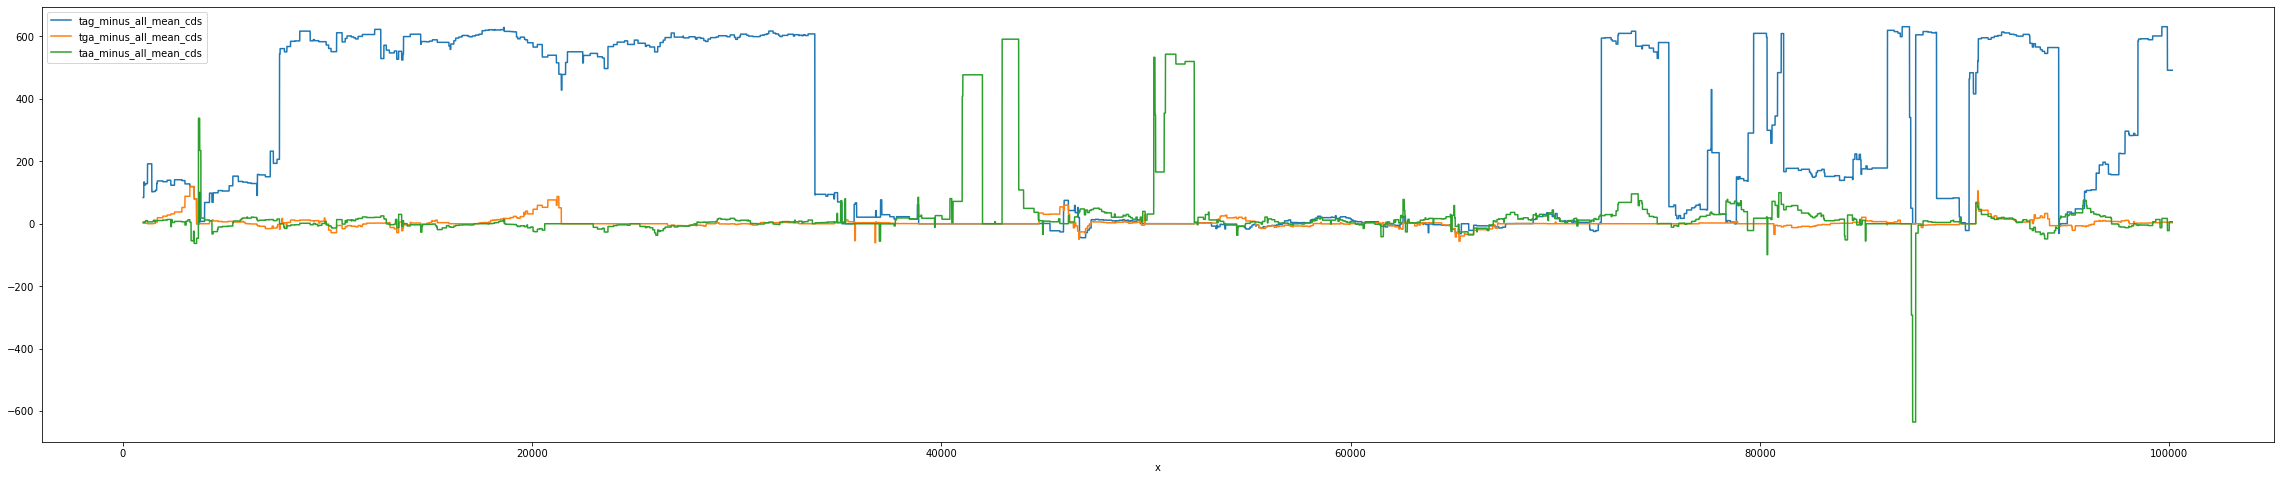

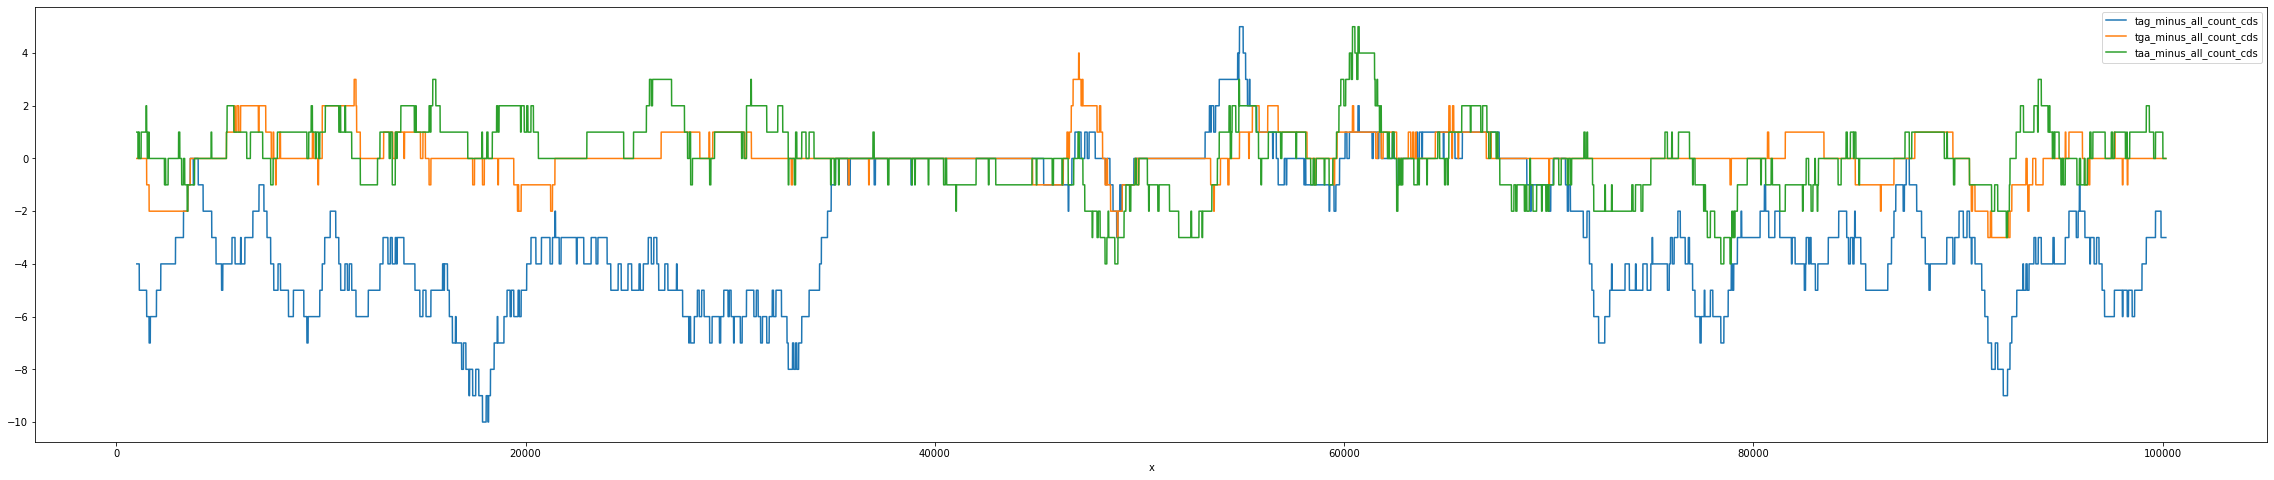

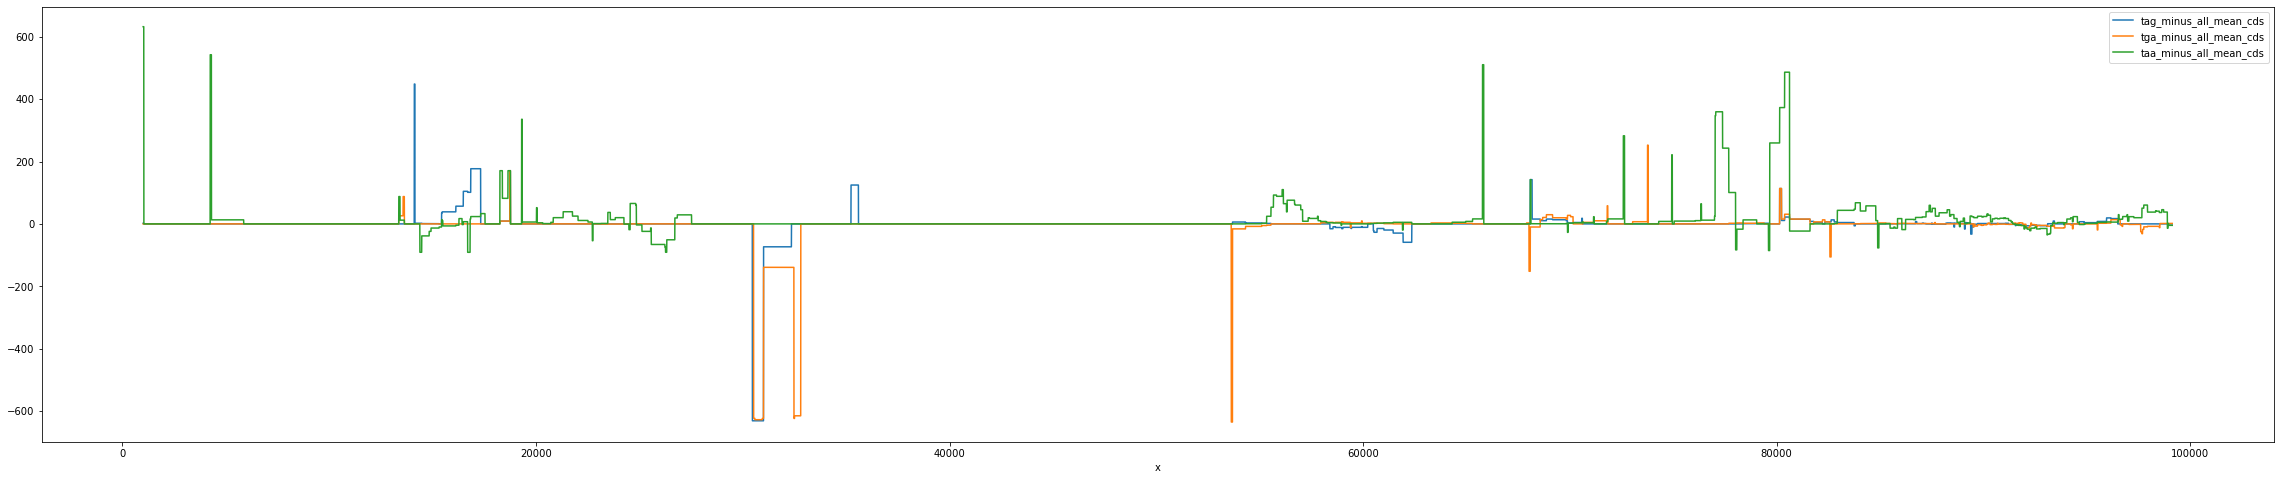

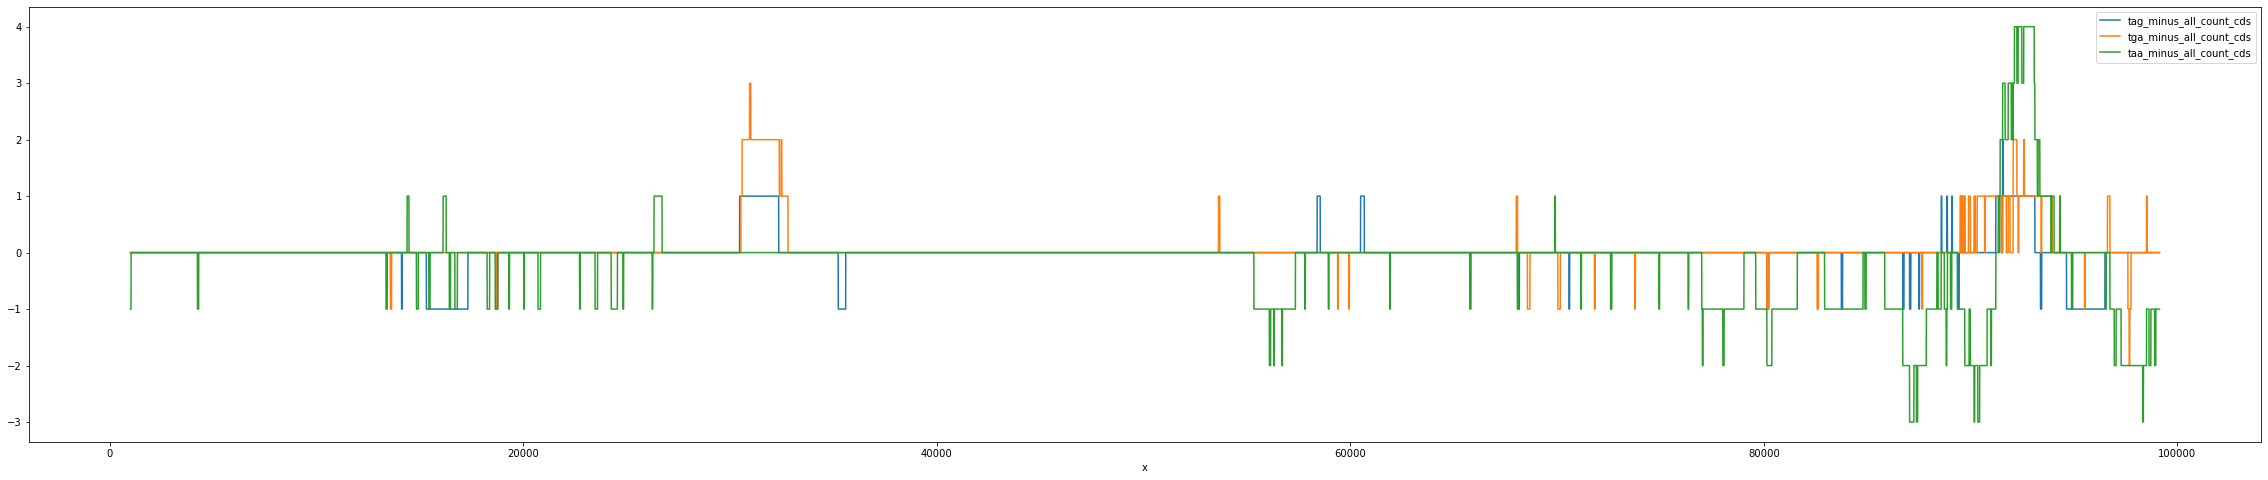

In [44]:
# UAG_readthru_list = [parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TGA-TAA.gbk'),
# parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TGA-TAA.gbk'),
# parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TAA.gbk'),
# parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TGA.gbk')]


# for record in parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TGA-TAA.gbk'):
#     df_all = get_rolling_mean_cds(record, window=2000, step=30)
# for record in parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TGA-TAA.gbk'):
#     df_tag = get_rolling_mean_cds(record, window=2000, step=30)
# for record in parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TAA.gbk'):
#     df_tga = get_rolling_mean_cds(record, window=2000, step=30)
# for record in parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TGA.gbk'):
#     df_taa = get_rolling_mean_cds(record, window=2000, step=30)

# df_all['Mean_CDS_all'] = df_all['Mean_CDS'] 
# df_all['Mean_CDS_tag'] = df_tag['Mean_CDS'] 
# df_all['Mean_CDS_tga'] = df_tga['Mean_CDS'] 
# df_all['Mean_CDS_taa'] = df_taa['Mean_CDS'] 

# df_all['tag_minus_all'] = df_all['Mean_CDS_tag'] - df_all['Mean_CDS_all']
# df_all['tga_minus_all'] = df_all['Mean_CDS_tga'] - df_all['Mean_CDS_all']
# df_all['taa_minus_all'] = df_all['Mean_CDS_taa'] - df_all['Mean_CDS_all']

df_all_uag = get_rolling_deltas(genbank_path_all = './genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta-TAG-TGA-TAA.gbk',
genbank_path_tag = './genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta-TGA-TAA.gbk',
genbank_path_tga = './genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta-TAG-TAA.gbk',
genbank_path_taa = './genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta-TAG-TGA.gbk')

# df_all_bc02 = get_rolling_deltas(genbank_path_all = './genbank/Bc02.fasta-TAG-TGA-TAA.gbk',
# genbank_path_tag = './genbank/Bc02.fasta-TGA-TAA.gbk',
# genbank_path_tga = './genbank/Bc02.fasta-TAG-TAA.gbk',
# genbank_path_taa = './genbank/Bc02.fasta-TAG-TGA.gbk')

df_all_bc01 = get_rolling_deltas(genbank_path_all = './genbank/Bc01.fasta-TAG-TGA-TAA.gbk',
genbank_path_tag = './genbank/Bc01.fasta-TGA-TAA.gbk',
genbank_path_tga = './genbank/Bc01.fasta-TAG-TAA.gbk',
genbank_path_taa = './genbank/Bc01.fasta-TAG-TGA.gbk', window = 1000)

df_all_bc02 = get_rolling_deltas(genbank_path_all = './genbank/Bc02.fasta-TAG-TGA-TAA.gbk',
genbank_path_tag = './genbank/Bc02.fasta-TGA-TAA.gbk',
genbank_path_tga = './genbank/Bc02.fasta-TAG-TAA.gbk',
genbank_path_taa = './genbank/Bc02.fasta-TAG-TGA.gbk')

df_all_bc11 = get_rolling_deltas(genbank_path_all = './genbank/Bc11.fasta-TAG-TGA-TAA.gbk',
genbank_path_tag = './genbank/Bc11.fasta-TGA-TAA.gbk',
genbank_path_tga = './genbank/Bc11.fasta-TAG-TAA.gbk',
genbank_path_taa = './genbank/Bc11.fasta-TAG-TGA.gbk')

# df_all_OFRY01000050 = get_rolling_deltas(genbank_path_all = './genbank/OFRY01000050-TAG-TGA-TAA.gbk',
# genbank_path_tag = './genbank/OFRY01000050-TGA-TAA.gbk',
# genbank_path_tga = './genbank/OFRY01000050-TAG-TAA.gbk',
# genbank_path_taa = './genbank/OFRY01000050-TAG-TGA.gbk')



df_all_uag.plot(x="x", y=["tag_minus_all_mean_cds", "tga_minus_all_mean_cds", 'taa_minus_all_mean_cds'], figsize=(40, 8))
df_all_uag.plot(x="x", y=["tag_minus_all_count_cds", "tga_minus_all_count_cds", 'taa_minus_all_count_cds'], figsize=(40, 8))

# df_all_bc01.plot(x="x", y=["tag_minus_all_mean_cds", "tga_minus_all_mean_cds", 'taa_minus_all_mean_cds'], figsize=(40, 8))
# df_all_bc01.plot(x="x", y=["tag_minus_all_count_cds", "tga_minus_all_count_cds", 'taa_minus_all_count_cds'], figsize=(40, 8))

# df_all_uag.plot(x="x", y=["tag_minus_all_mean_cds", "tga_minus_all_mean_cds", 'taa_minus_all_mean_cds'], figsize=(40, 8))
# df_all_uag.plot(x="x", y=["tag_minus_all_count_cds", "tga_minus_all_count_cds", 'taa_minus_all_count_cds'], figsize=(40, 8))
# df_all_uag.plot(x="x", y=["TAG_all", "TGA_all", 'TAA_all'], figsize=(40, 8))

df_all_bc01.plot(x="x", y=["tag_minus_all_mean_cds", "tga_minus_all_mean_cds", 'taa_minus_all_mean_cds'], figsize=(40, 8))
df_all_bc01.plot(x="x", y=["tag_minus_all_count_cds", "tga_minus_all_count_cds", 'taa_minus_all_count_cds'], figsize=(40, 8))
# df_all_bc01.plot(x="x", y=["TAG_all", "TGA_all", 'TAA_all'], figsize=(40, 8))

# df_all_OFRY01000050.plot(x="x", y=["tag_minus_all_mean_cds", "tga_minus_all_mean_cds", 'taa_minus_all_mean_cds'], figsize=(40, 8))
# df_all_OFRY01000050.plot(x="x", y=["tag_minus_all_count_cds", "tga_minus_all_count_cds", 'taa_minus_all_count_cds'], figsize=(40, 8))
#df_all_OFRY01000050.plot(x="x", y=["TAG_all", "TGA_all", 'TAA_all'], figsize=(40, 8))


# df_file = 'OFRY01000050_artemis.txt'



# df_all_OFRY01000050 = df_all_OFRY01000050.drop(['Mean_CDS', 'Mean_CDS_all', 'Mean_CDS_tag', 'Mean_CDS_tga', 'Mean_CDS_taa', 'Count_CDS_all', 'Count_CDS_tag', 'Count_CDS_tga', 'Count_CDS_taa'], axis=1)

# df_all_OFRY01000050 = df_all_OFRY01000050.drop(['tag_minus_all_count_cds', 'tga_minus_all_count_cds', 'taa_minus_all_count_cds'], axis=1)

# write_df_to_artemis(df_all_OFRY01000050, df_file)


df_file = 'bc01_artemis.txt'



df_all_bc01 = df_all_bc01.drop(['Mean_CDS', 'Mean_CDS_all', 'Mean_CDS_tag', 'Mean_CDS_tga', 'Mean_CDS_taa', 'Count_CDS_all', 'Count_CDS_tag', 'Count_CDS_tga', 'Count_CDS_taa'], axis=1)

df_all_bc01 = df_all_bc01.drop(['tag_minus_all_count_cds', 'tga_minus_all_count_cds', 'taa_minus_all_count_cds'], axis=1)

write_df_to_artemis(df_all_bc01, df_file)

df_file = 'bc02_artemis.txt'

df_all_bc02 = df_all_bc02.drop(['Mean_CDS', 'Mean_CDS_all', 'Mean_CDS_tag', 'Mean_CDS_tga', 'Mean_CDS_taa', 'Count_CDS_all', 'Count_CDS_tag', 'Count_CDS_tga', 'Count_CDS_taa'], axis=1)

df_all_bc02 = df_all_bc02.drop(['tag_minus_all_count_cds', 'tga_minus_all_count_cds', 'taa_minus_all_count_cds'], axis=1)

write_df_to_artemis(df_all_bc02, df_file)

df_file = 'bc11_artemis.txt'

df_all_bc11 = df_all_bc11.drop(['Mean_CDS', 'Mean_CDS_all', 'Mean_CDS_tag', 'Mean_CDS_tga', 'Mean_CDS_taa', 'Count_CDS_all', 'Count_CDS_tag', 'Count_CDS_tga', 'Count_CDS_taa'], axis=1)

df_all_bc11 = df_all_bc11.drop(['tag_minus_all_count_cds', 'tga_minus_all_count_cds', 'taa_minus_all_count_cds'], axis=1)

write_df_to_artemis(df_all_bc11, df_file)



# df_all_bc02.plot(x="x", y=["tag_minus_all_mean_cds", "tga_minus_all_mean_cds", 'taa_minus_all_mean_cds'], figsize=(40, 8))
# df_all_bc02.plot(x="x", y=["tag_minus_all_count_cds", "tga_minus_all_count_cds", 'taa_minus_all_count_cds'], figsize=(40, 8))
# df_all_bc02.plot(x="x", y=["TAG_all", "TGA_all", 'TAA_all'], figsize=(40, 8))

# df_file = 'test_artemis.txt'

# write_df_to_artemis(df_all_bc02, df_file)



# df_all_bc11.plot(x="x", y=["tag_minus_all_mean_cds", "tga_minus_all_mean_cds", 'taa_minus_all_mean_cds'], figsize=(40, 8))
# df_all_bc11.plot(x="x", y=["tag_minus_all_count_cds", "tga_minus_all_count_cds", 'taa_minus_all_count_cds'], figsize=(40, 8))







## Checking various stats

=== Some basic statistics ===
=== Working on file ./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TGA-TAA.gbk ===
Stats for MZ130495.1 (101130 bp)
GC content: 0.3295164639572827
Number of CDS: 278
Average CDS length: 95.46402877697842
Median CDS length: 60.0
Average coding density: 0.780263027786018
=== Working on file ./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TGA-TAA.gbk ===


/Users/a1667917/miniforge3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       MZ130495.1    101130 bp    DNA             PHG\n'
  warnings.warn(


Stats for MZ130495.1 (101130 bp)
GC content: 0.3295164639572827
Number of CDS: 138
Average CDS length: 233.8913043478261
Median CDS length: 126.0
Average coding density: 0.9516760605161673
=== Working on file ./genbank/Bc02-TAG-TGA-TAA.gbk ===


/Users/a1667917/miniforge3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus     99492 bp    DNA             PHG\n'
  warnings.warn(


Stats for cluster_001_consensus (99492 bp)
GC content: 0.3299662284404776
Number of CDS: 127
Average CDS length: 249.24409448818898
Median CDS length: 139.0
Average coding density: 0.9490612310537531
=== Working on file ./genbank/Bc02-TGA-TAA.gbk ===


/Users/a1667917/miniforge3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus     99492 bp    DNA             PHG\n'
  warnings.warn(


Stats for cluster_001_consensus (99492 bp)
GC content: 0.3299662284404776
Number of CDS: 132
Average CDS length: 243.57575757575756
Median CDS length: 136.0
Average coding density: 0.9627407228721907


/Users/a1667917/miniforge3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(
/Users/a1667917/miniforge3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       MZ130495.1    101130 bp    DNA             PHG\n'
  warnings.warn(


<AxesSubplot:xlabel='x'>

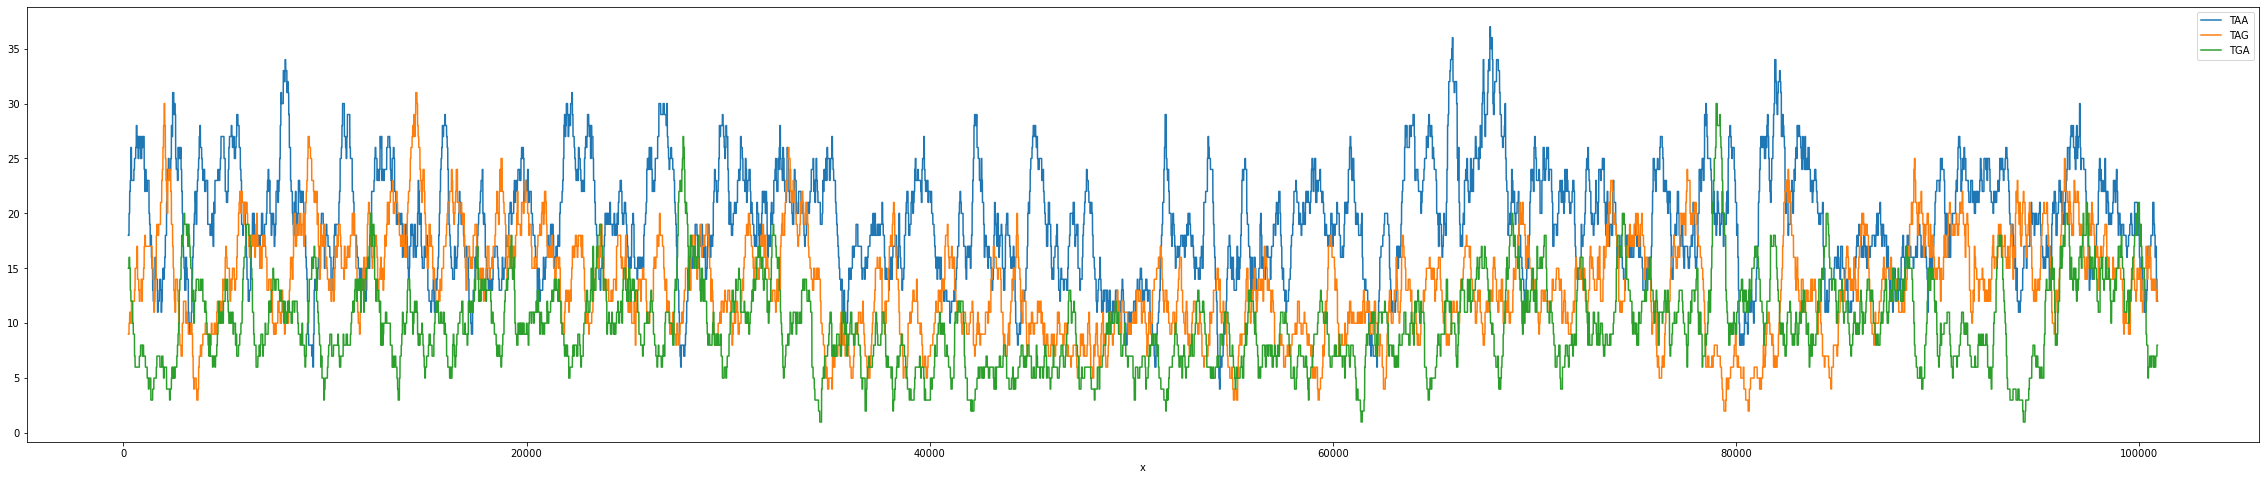

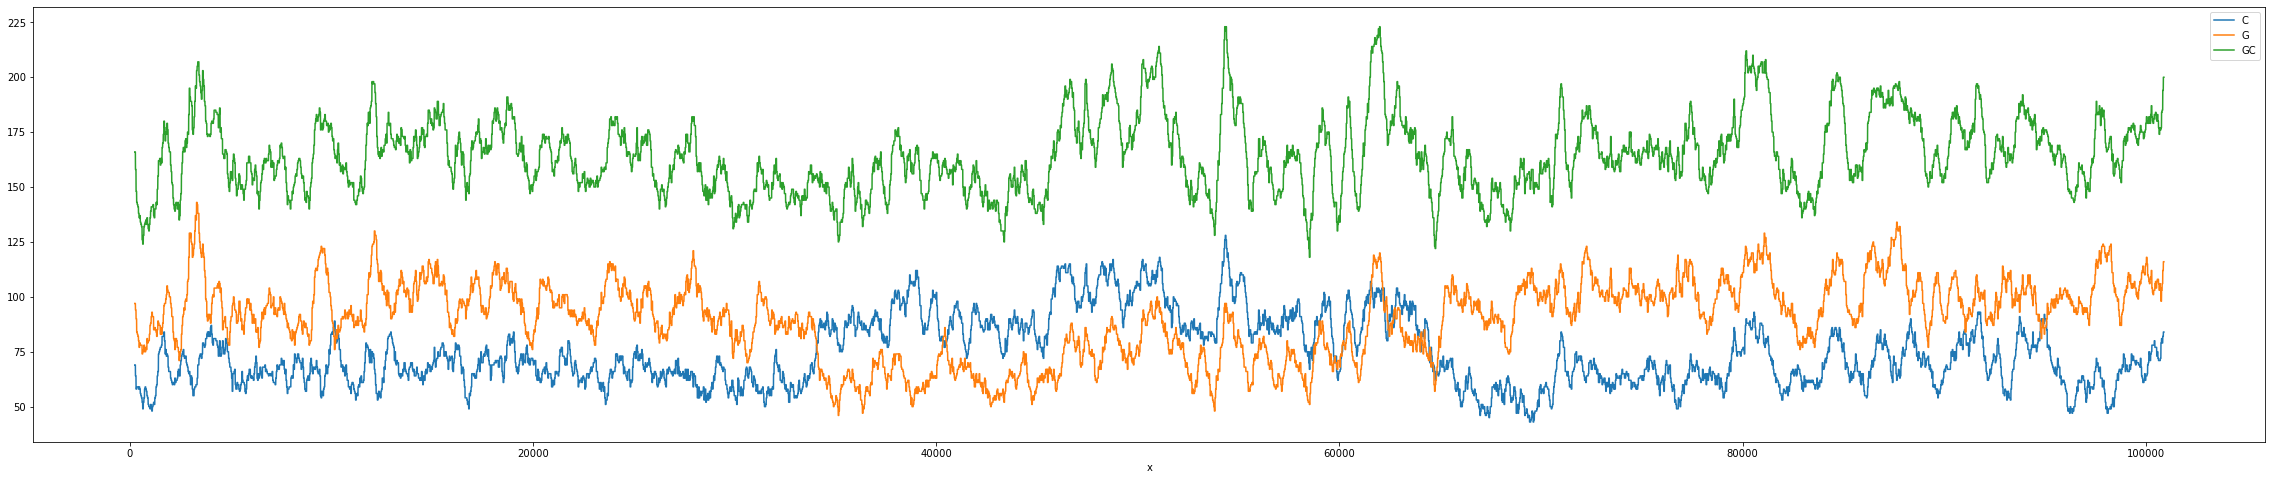

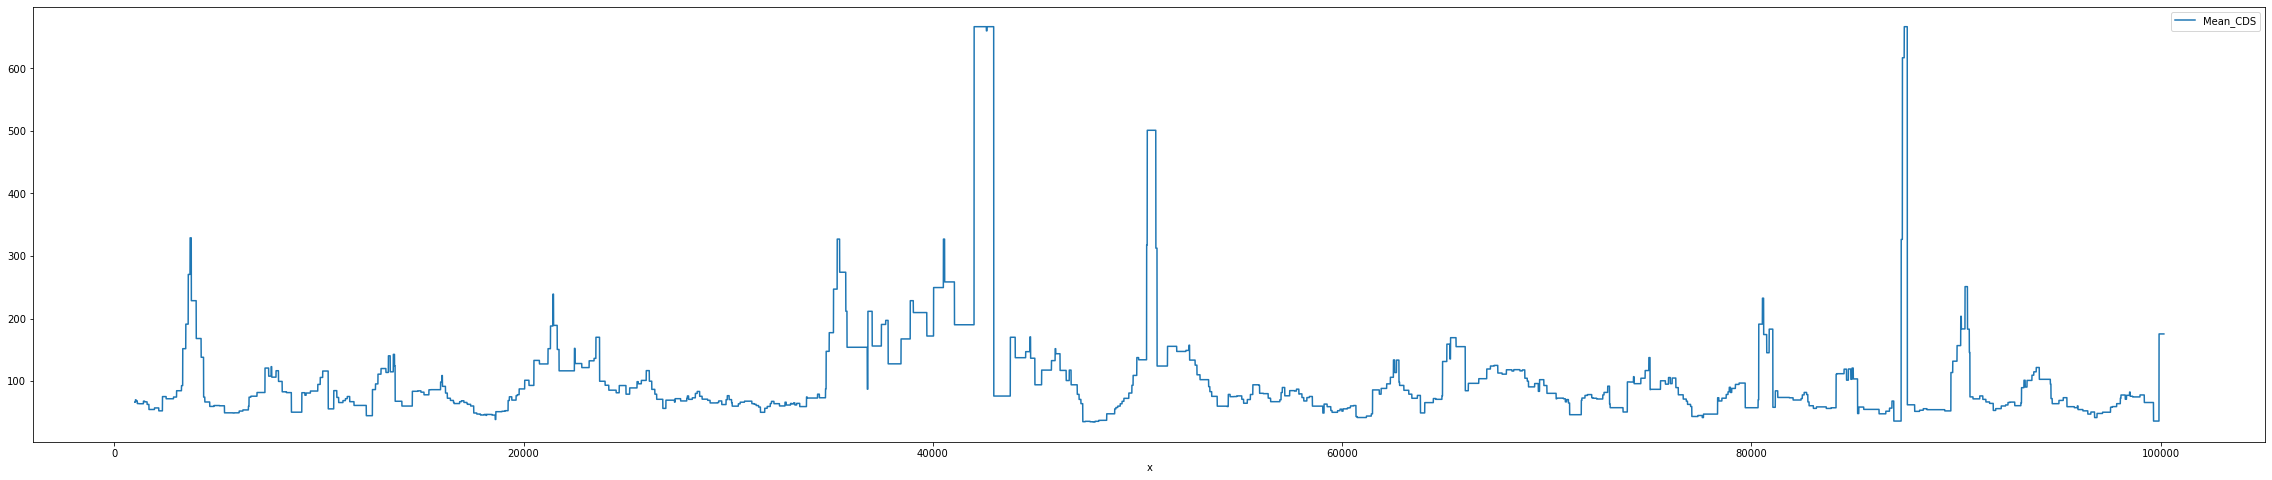

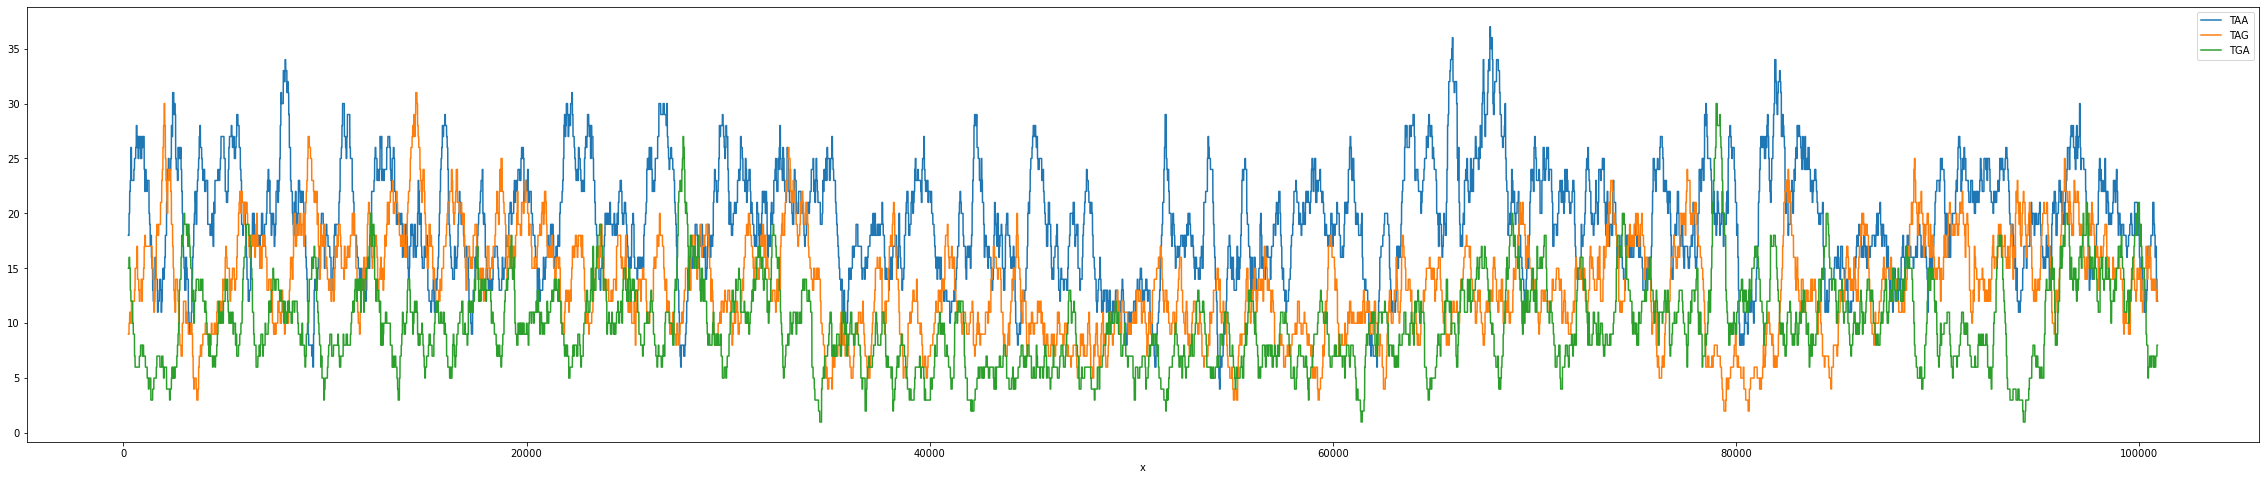

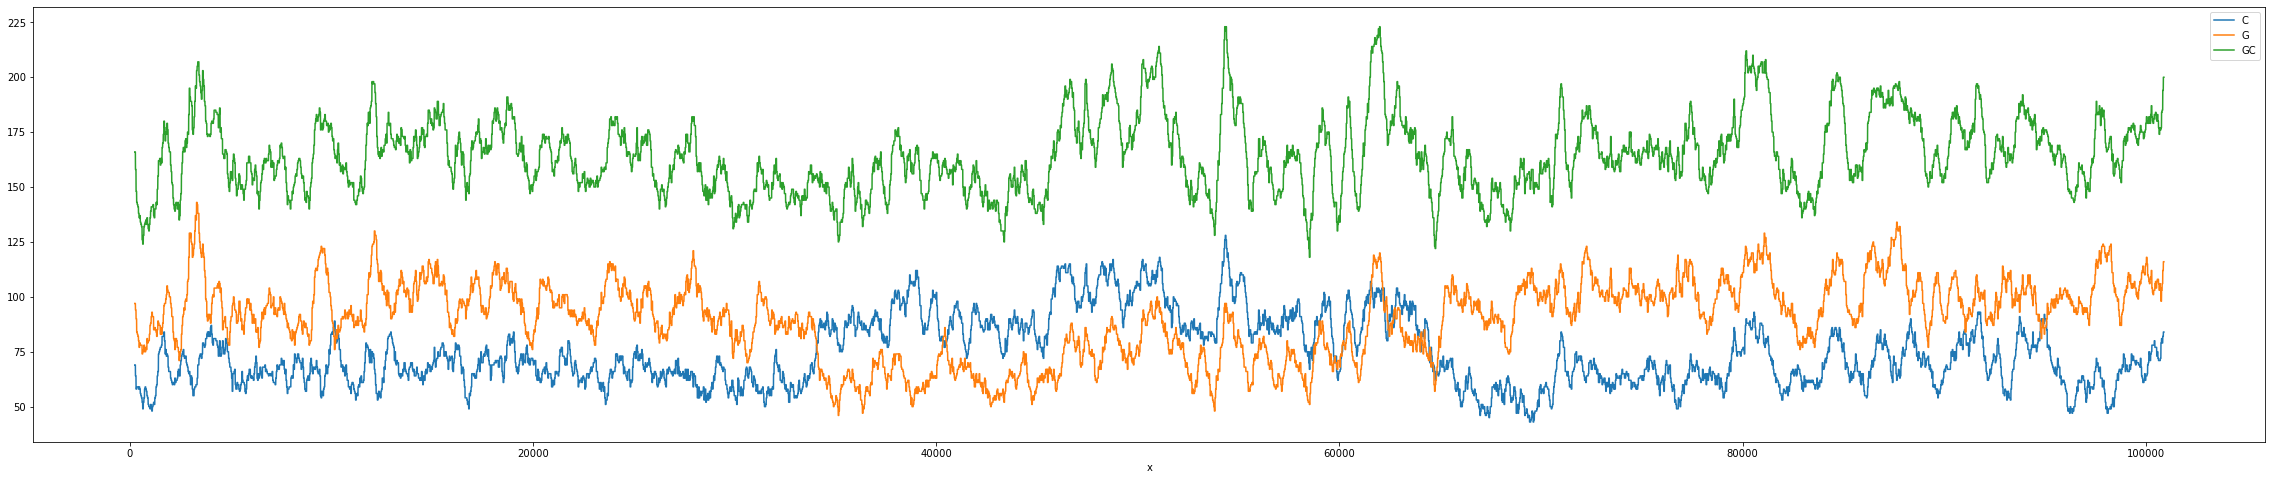

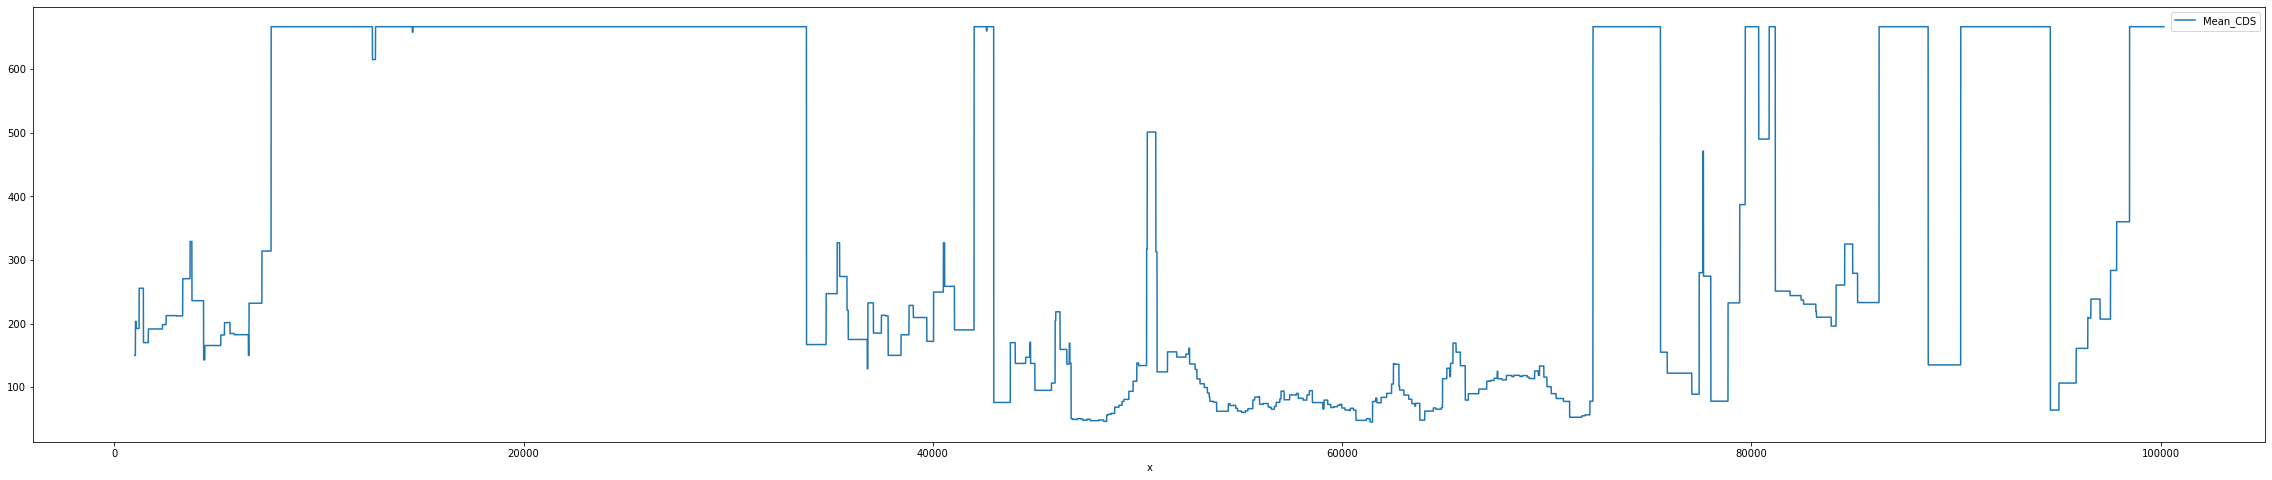

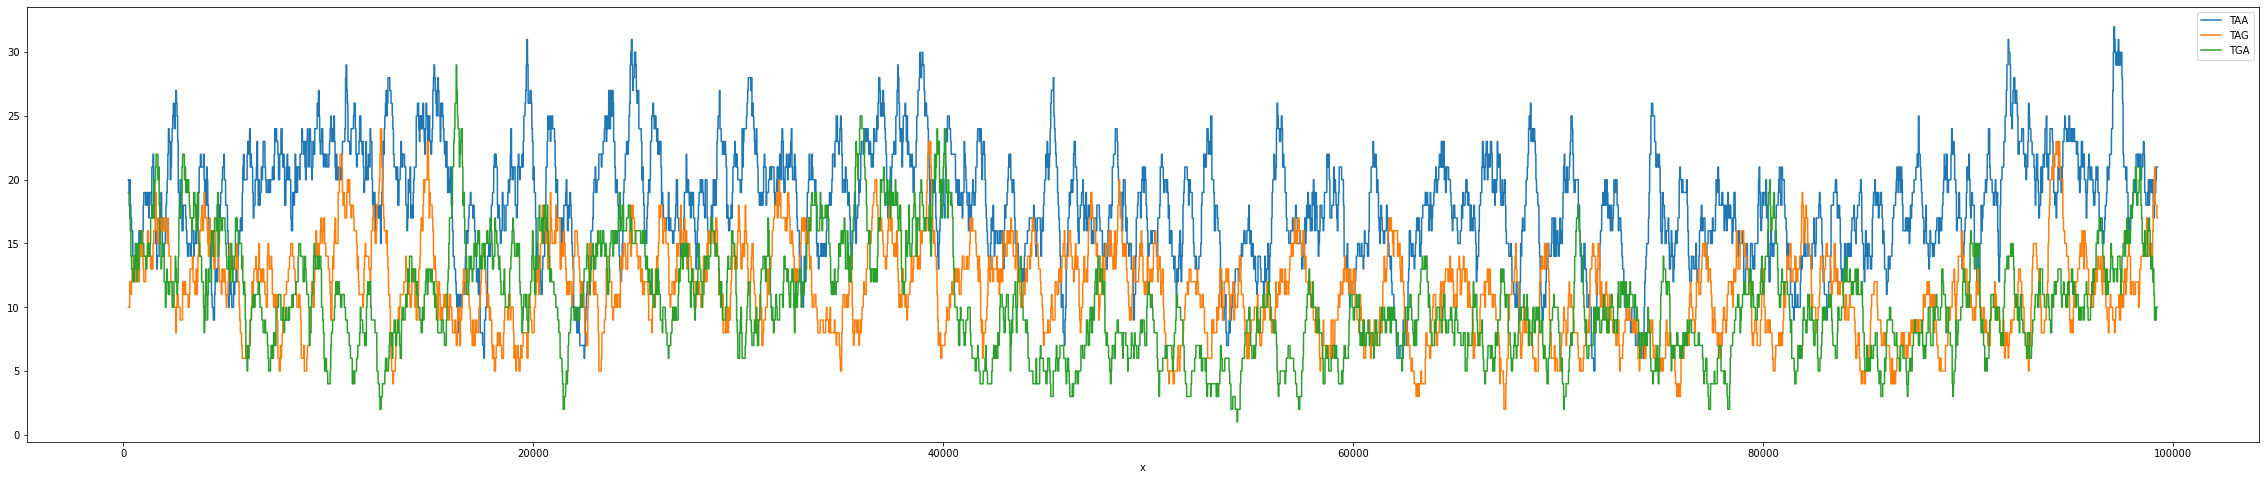

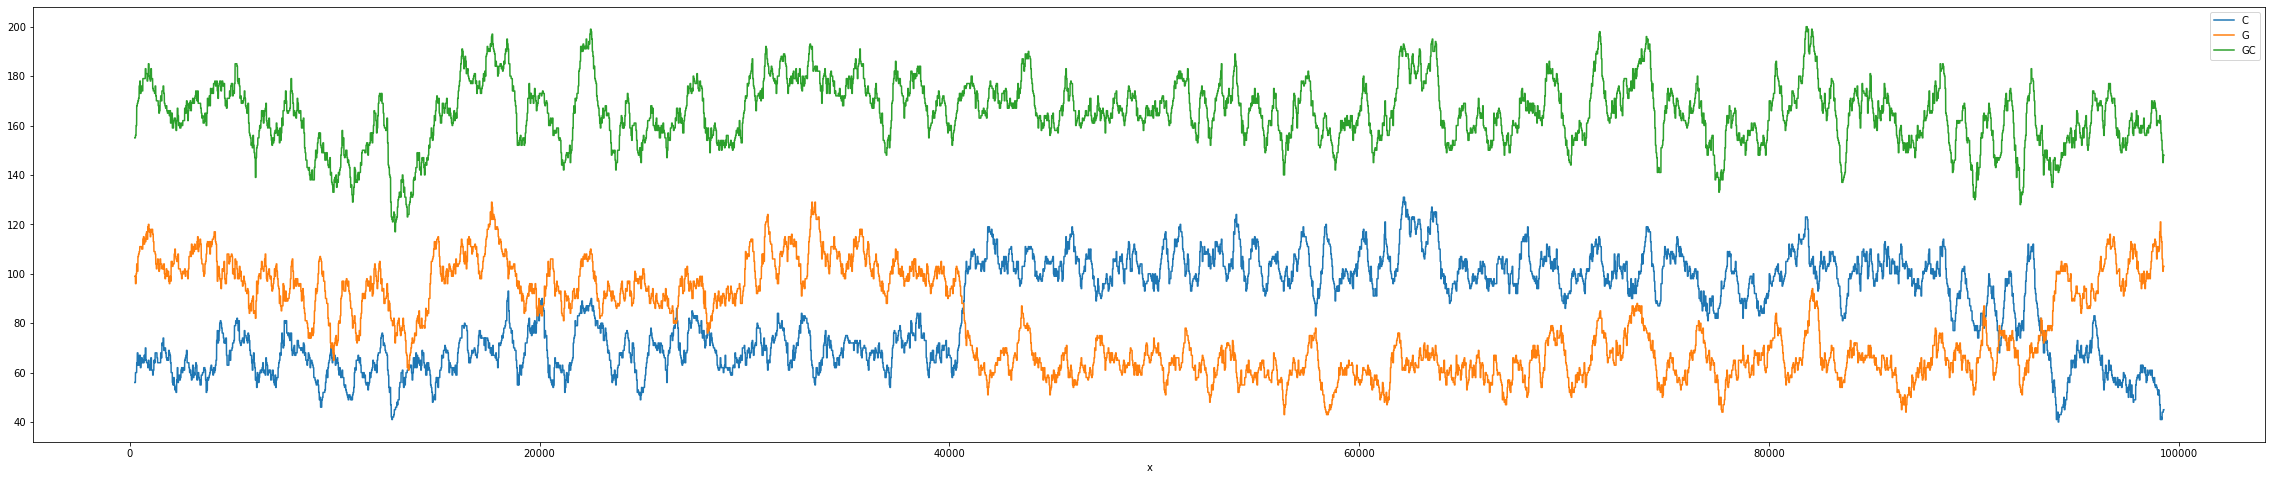

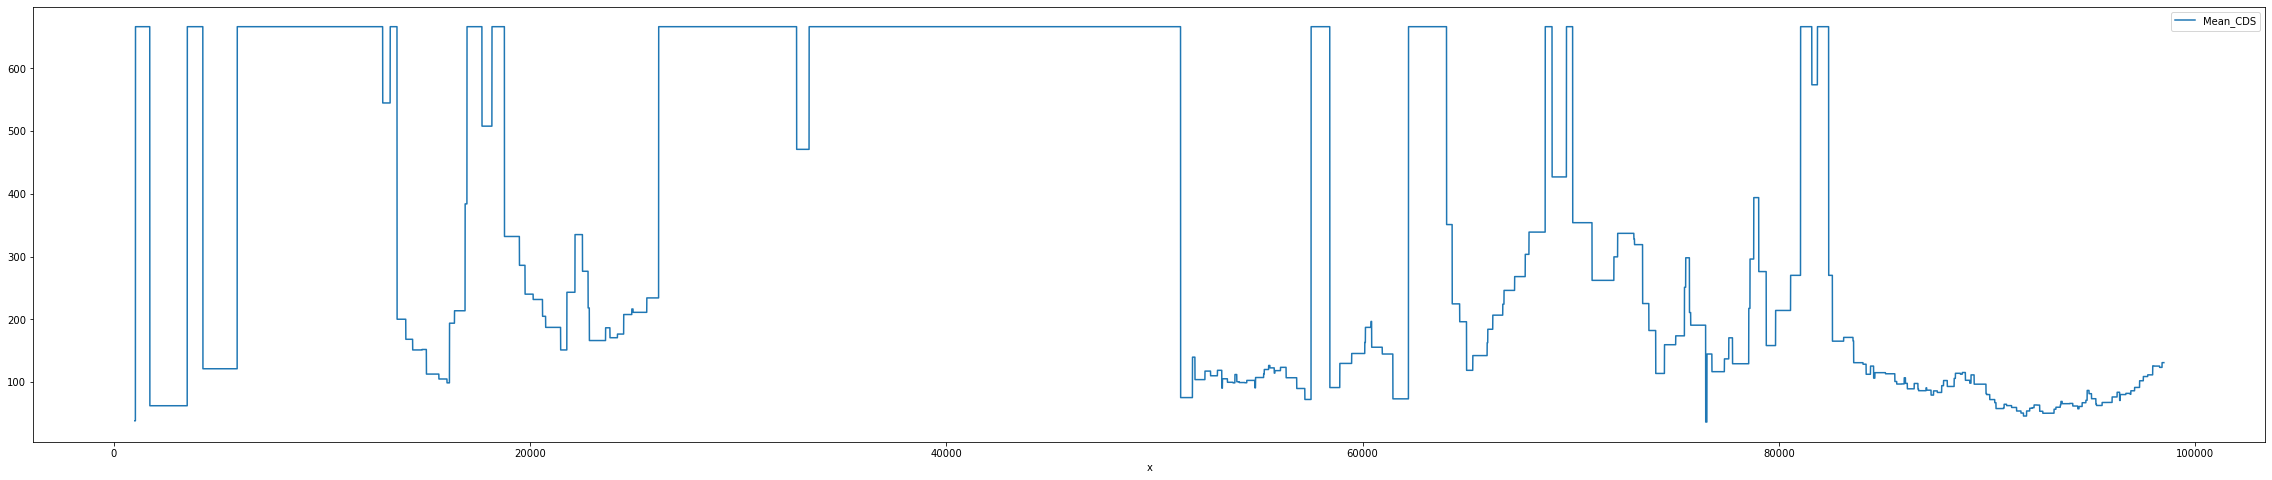

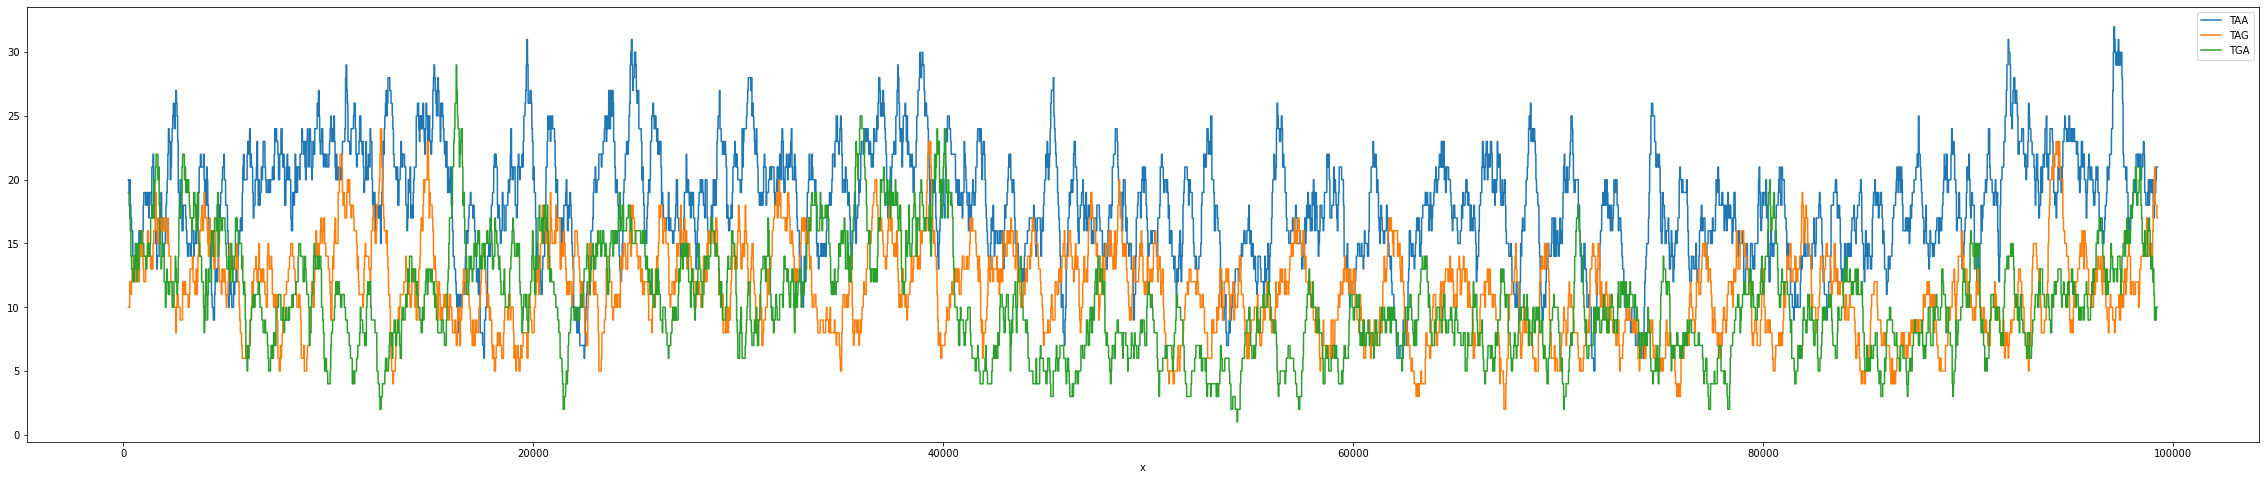

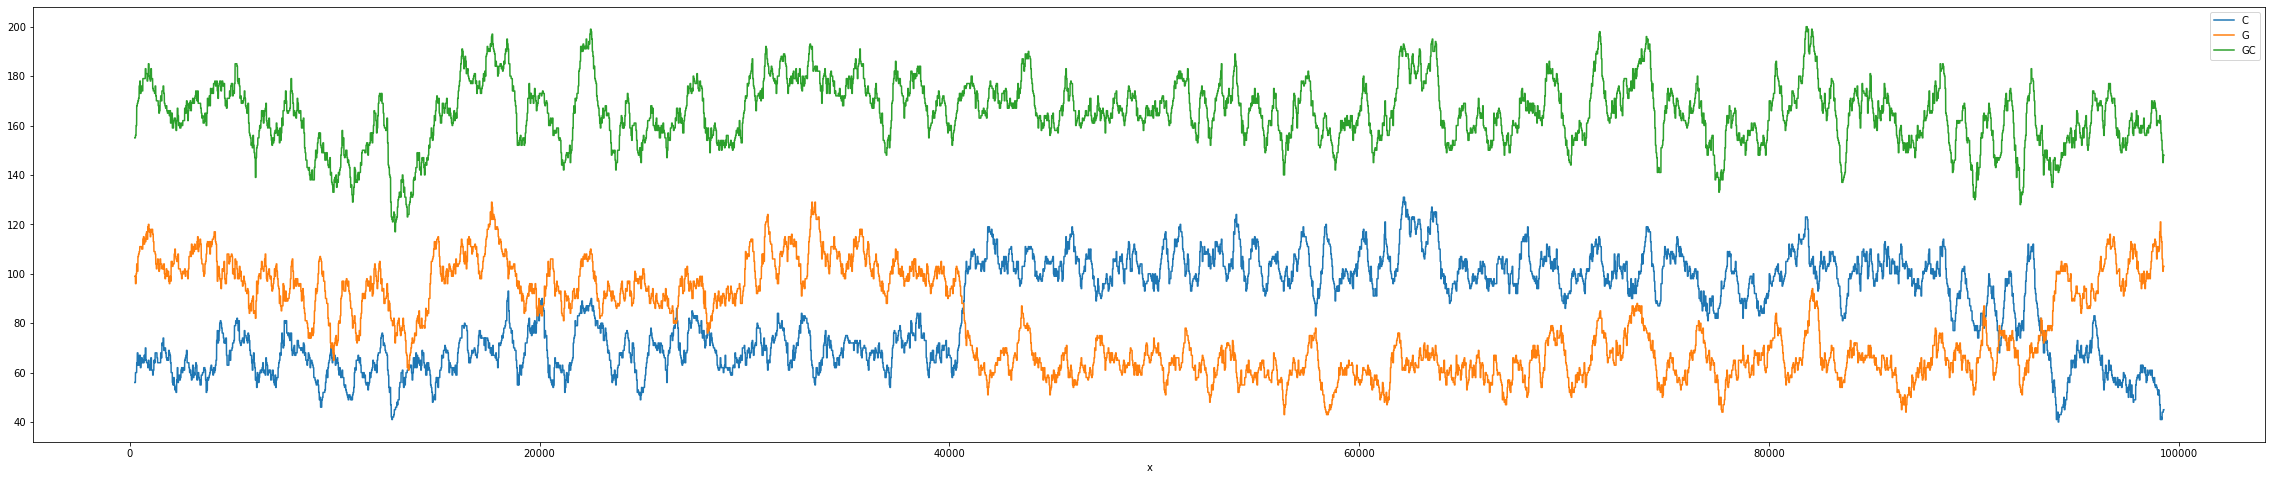

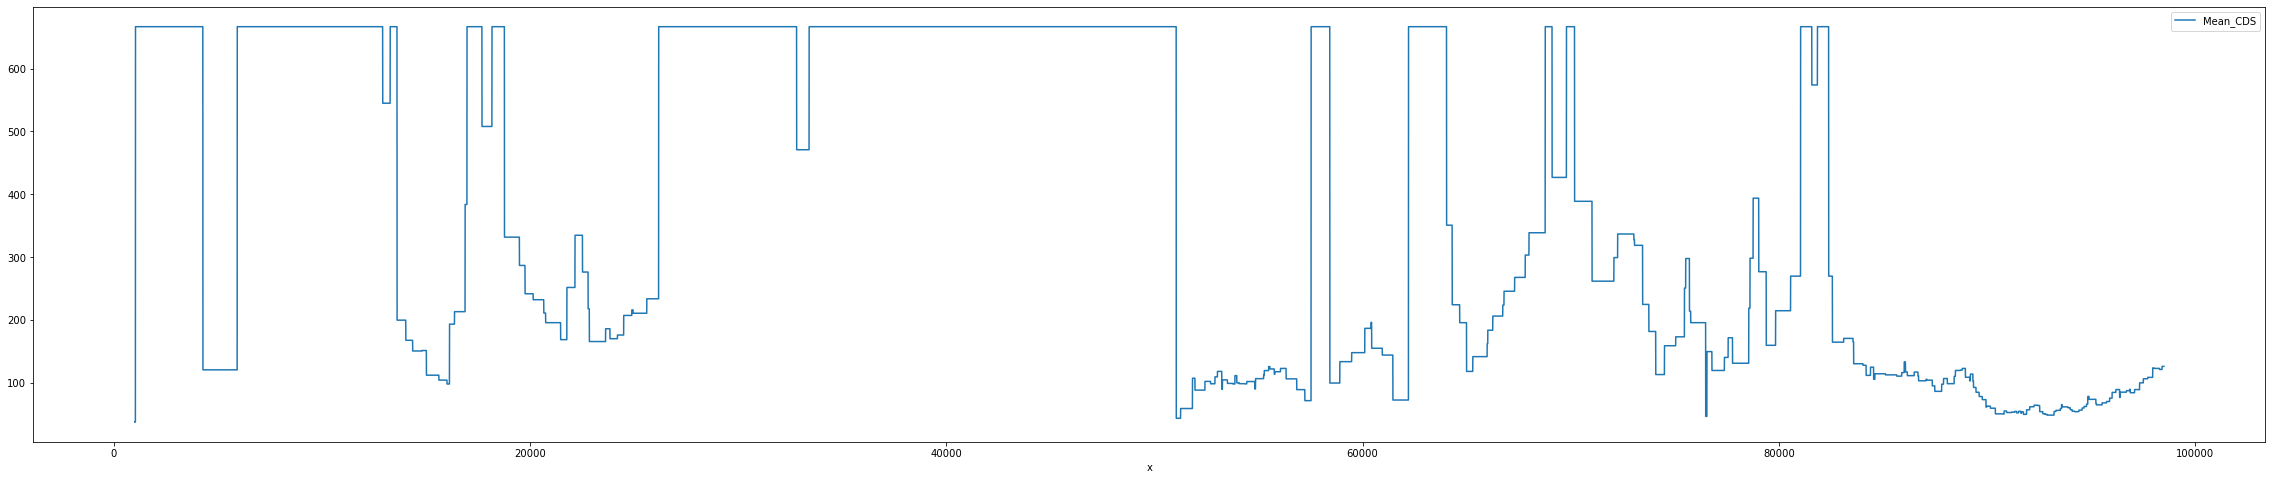

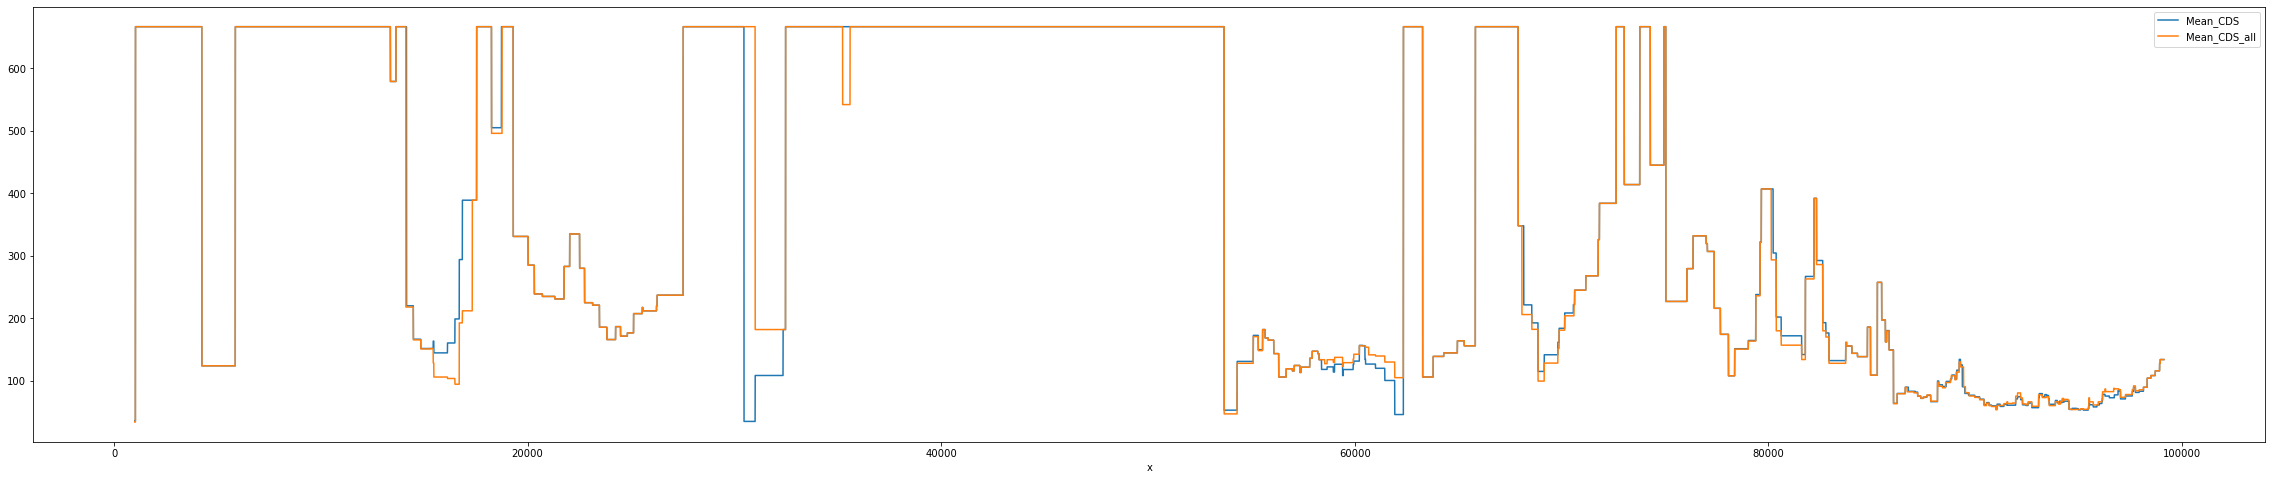

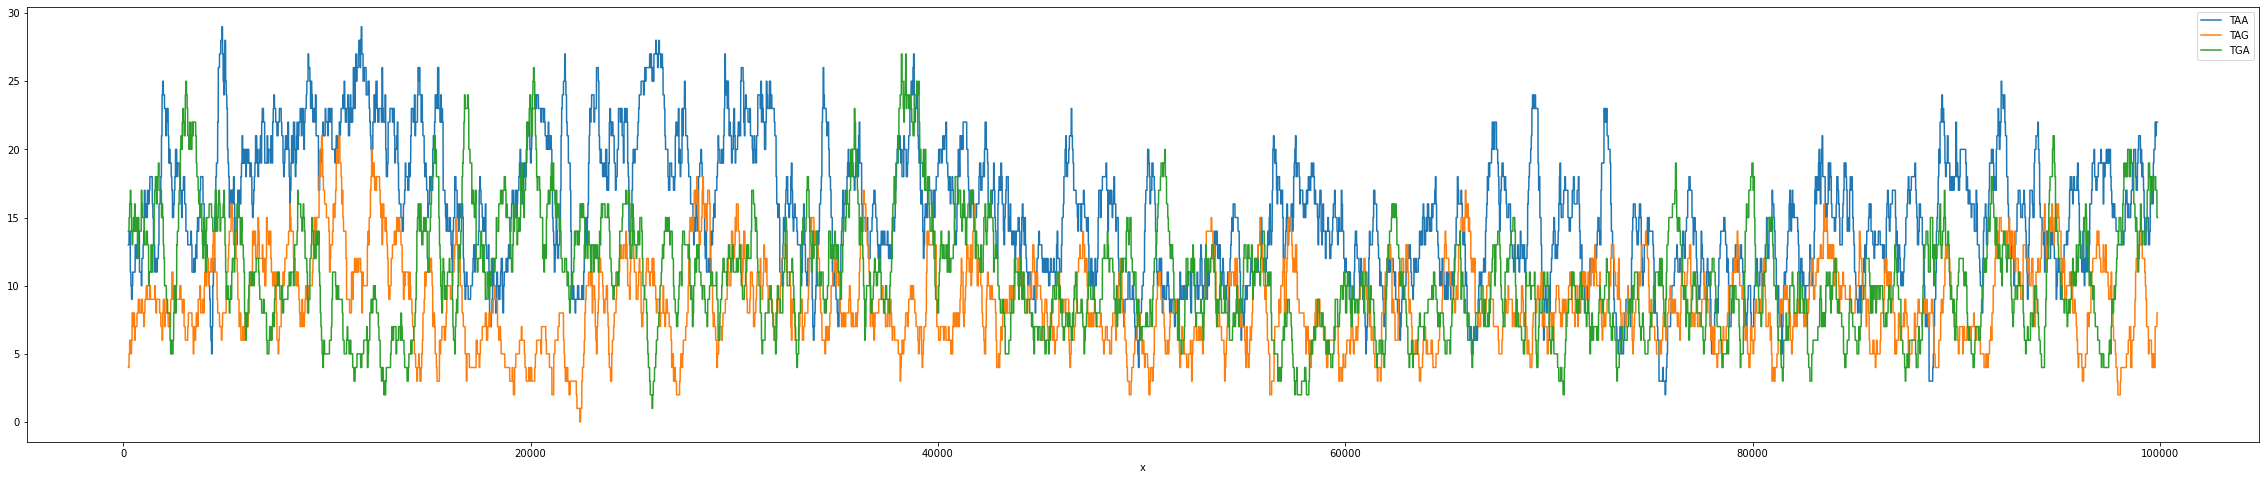

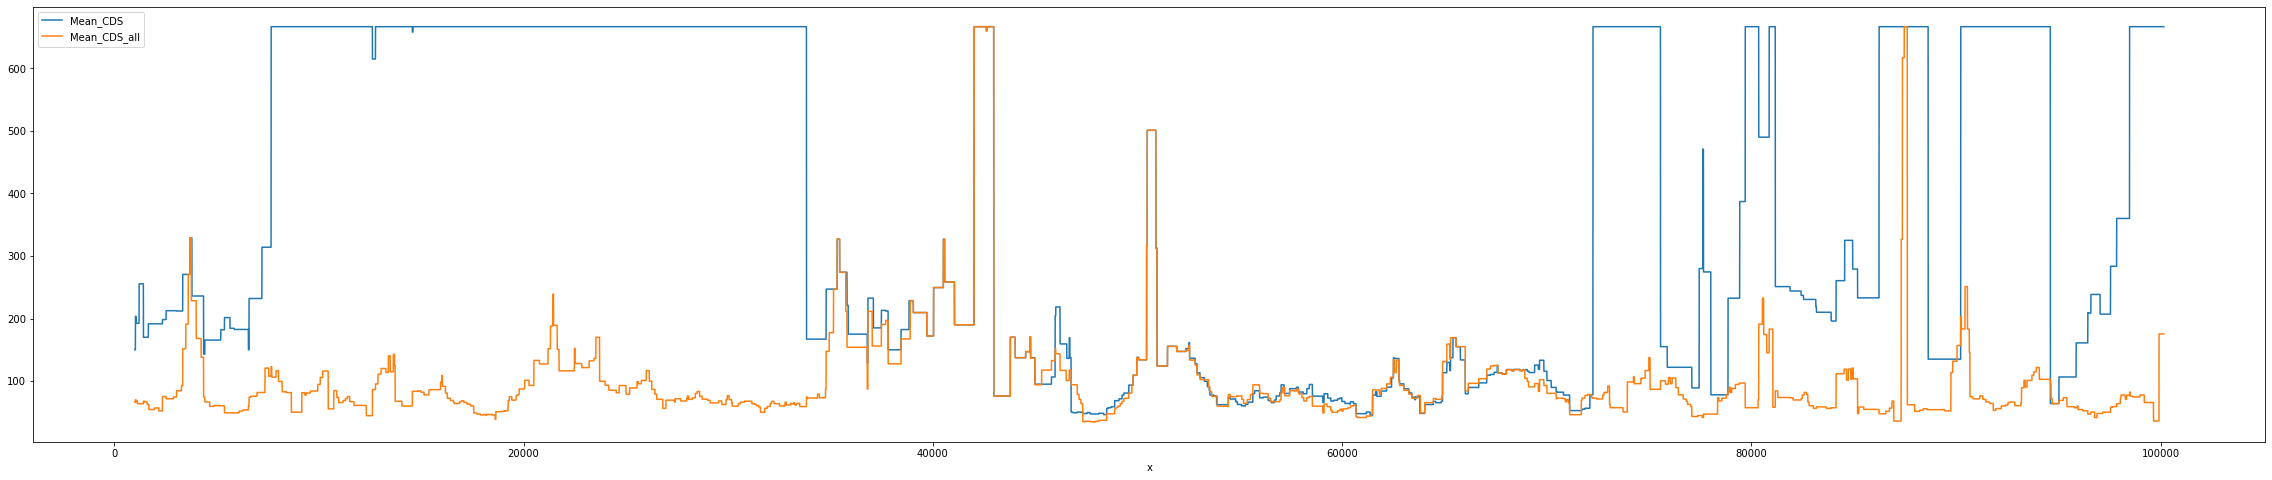

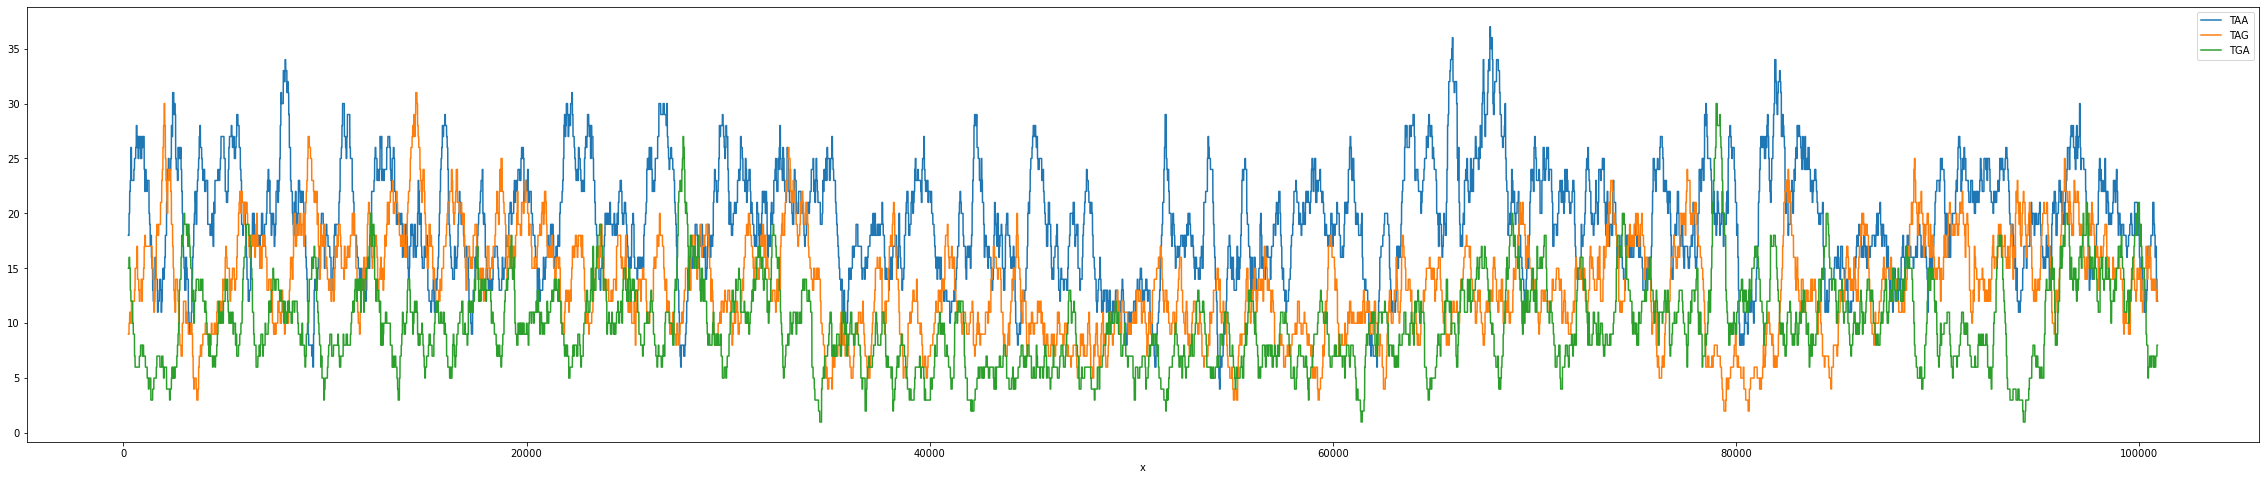

In [ ]:
infiles = glob.glob('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1*.gbk')
outdir = 'tmp'
if not os.path.exists(outdir): os.mkdir(outdir)

print("=== Some basic statistics ===")
for infile in ['./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TGA-TAA.gbk', './genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TGA-TAA.gbk']:
    print("=== Working on file {} ===".format(infile))
    for record in parse_genbank(infile):
        df = get_distribution_of_stops(record, window=500, step=30)
        df.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))
        df = get_rolling_gc(record, window=500, step=30)
        df.plot(x="x", y=["C", "G", "GC"], figsize=(40, 8))
        df = get_rolling_mean_cds(record, window=2000, step=30)
        df.plot(x="x", y=["Mean_CDS"], figsize=(40, 8))
        print("Stats for {} ({} bp)".format(record.id, len(record.seq)))
        print("GC content: {}".format(get_gc_content(record.seq)))
        cdss = get_features_of_type(record, 'CDS')
        print("Number of CDS: {}".format(len(cdss)))
        cdss_lengths = get_features_lengths(record, 'CDS')
        print("Average CDS length: {}".format(mean(cdss_lengths)))
        print("Median CDS length: {}".format(median(cdss_lengths)))
        print("Average coding density: {}".format(get_coding_density(record)))

infiles = glob.glob('./genbank/Bc02*.gbk')
for infile in ['./genbank/Bc02-TAG-TGA-TAA.gbk', './genbank/Bc02-TGA-TAA.gbk']:
    print("=== Working on file {} ===".format(infile))
    for record in parse_genbank(infile):
        df = get_distribution_of_stops(record, window=500, step=30)
        df.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))
        df = get_rolling_gc(record, window=500, step=30)
        df.plot(x="x", y=["C", "G", "GC"], figsize=(40, 8))
        df = get_rolling_mean_cds(record, window=2000, step=30)
        df.plot(x="x", y=["Mean_CDS"], figsize=(40, 8))
        print("Stats for {} ({} bp)".format(record.id, len(record.seq)))
        print("GC content: {}".format(get_gc_content(record.seq)))
        cdss = get_features_of_type(record, 'CDS')
        print("Number of CDS: {}".format(len(cdss)))
        cdss_lengths = get_features_lengths(record, 'CDS')
        print("Average CDS length: {}".format(mean(cdss_lengths)))
        print("Median CDS length: {}".format(median(cdss_lengths)))
        print("Average coding density: {}".format(get_coding_density(record)))


for record in parse_genbank('./genbank/Bc01-TAG-TGA-TAA.gbk'):
    df_all = get_rolling_mean_cds(record, window=2000, step=30)
for record in parse_genbank('./genbank/Bc01-TGA-TAA.gbk'):
    df_tag = get_rolling_mean_cds(record, window=2000, step=30)
    df_stop = get_distribution_of_stops(record, window=500, step=30)

df_tag['Mean_CDS_all'] = df_all['Mean_CDS']
df_tag.plot(x="x", y=["Mean_CDS", "Mean_CDS_all"], figsize=(40, 8))
df_stop.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))

for record in parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TGA-TAA.gbk'):
    df_all = get_rolling_mean_cds(record, window=2000, step=30)
for record in parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TGA-TAA.gbk'):
    df_tag = get_rolling_mean_cds(record, window=2000, step=30)
    df_stop = get_distribution_of_stops(record, window=500, step=30)

df_tag['Mean_CDS_all'] = df_all['Mean_CDS']
df_tag.plot(x="x", y=["Mean_CDS", "Mean_CDS_all"], figsize=(40, 8))
df_stop.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))


# for record in genbank_seqio('./genbank/Bc02-TAG-TGA-TAA.gbk'):
#     df_all = get_rolling_mean_cds(record, window=5000, step=30)
# for record in genbank_seqio('./genbank/Bc02-TGA-TAA.gbk'):
#     df_tag = get_rolling_mean_cds(record, window=5000, step=30)
#     df_stop = get_distribution_of_stops(record, window=500, step=30)

# df_tag['Mean_CDS_all'] = df_all['Mean_CDS']
# df_tag.plot(x="x", y=["Mean_CDS", "Mean_CDS_all"], figsize=(40, 8))
# df_stop.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))

# for record in genbank_seqio('./genbank/Bc11-TAG-TGA-TAA.gbk'):
#     df_all = get_rolling_mean_cds(record, window=5000, step=30)
# for record in genbank_seqio('./genbank/Bc11-TGA-TAA.gbk'):
#     df_tag = get_rolling_mean_cds(record, window=5000, step=30)
#     df_stop = get_distribution_of_stops(record, window=500, step=30)

# df_tag['Mean_CDS_all'] = df_all['Mean_CDS']
# df_tag.plot(x="x", y=["Mean_CDS", "Mean_CDS_all"], figsize=(40, 8))
# df_stop.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))

# for record in genbank_seqio('./genbank/GCA_002135175.2-subset-TAG-TGA-TAA.gbk'):
#     df_all = get_rolling_mean_cds(record, window=5000, step=30)
# for record in genbank_seqio('./genbank/GCA_002135175.2-subset-TGA-TAA.gbk'):
#     df_tag = get_rolling_mean_cds(record, window=5000, step=30)
#     df_stop = get_distribution_of_stops(record, window=500, step=30)

# df_tag['Mean_CDS_all'] = df_all['Mean_CDS']
# df_tag.plot(x="x", y=["Mean_CDS", "Mean_CDS_all"], figsize=(40, 8))
# df_stop.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))

# record = list(genbank_seqio(infiles[0]))[0]
# print(get_average_cds_length_rec(record))
# df = get_distribution_of_stops(record, window=1200, step=200)

# df.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))
# print(df.head(150))
# visualise(df.drop(['x'], axis=1), length=len(df['x']), labels=['TAA', 'TAG', 'TGA'])
# df = get_distribution_of_stops(record, window=1200, step=200)
# visualise(df.drop(['x'], axis=1), length=len(df['x']), labels=['TAA', 'TAG', 'TGA'])

# Testing functions

In [ ]:
infiles = glob.glob('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1*.gbk')
outdir = 'tmp'
if not os.path.exists(outdir): os.mkdir(outdir)

print("=== Some basic statistics ===")
for infile in infiles[:1]:
    print("Input file: {}".format(os.path.basename(infile)))
    for record in parse_genbank(infile):
        print("Stats for {} ({} bp)".format(record.id, len(record.seq)))
        print("GC content: {}".format(get_gc_content(record.seq)))
        cdss = get_features_of_type(record, 'CDS')
        print("Number of CDS: {}".format(len(cdss)))
        cdss_lengths = get_features_lengths(record, 'CDS')
        print("Average CDS length: {}".format(mean(cdss_lengths)))
        print("Median CDS length: {}".format(median(cdss_lengths)))
        print("Average coding density: {}".format(get_coding_density(record)))
        df = get_distribution_of_stops(record, window=210, step=1)
        df_stops_file = os.path.join(outdir, '{}.{}_stops.csv'.format(os.path.basename(infile), record.id))
        print("Writing distribution of stops to {}".format(df_stops_file))
        write_df_to_artemis(df, df_stops_file)

print("=== Average coding densities ===")
for infile in infiles:
    for record in parse_genbank(infile):
        print("{} - {}: {}".format(os.path.basename(infile), record.id, get_coding_density(record, ['CDS', 'tRNA'])))

=== Some basic statistics ===
Input file: UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAA.gbk
Stats for MZ130495.1 (101130 bp)
GC content: 0.3295164639572827
Number of CDS: 143
Average CDS length: 225.27972027972027
Median CDS length: 120.0
Average coding density: 0.9494116483733808


/home/dec/miniconda3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1555: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       MZ130495.1    101130 bp    DNA             PHG\n'
  warnings.warn(


Writing distribution of stops to tmp/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAA.gbk.MZ130495.1_stops.csv
=== Average coding densities ===
UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAA.gbk - MZ130495.1: 0.9494116483733808
UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TAA.gbk - MZ130495.1: 0.8097399386927717
UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TGA-TAA.gbk - MZ130495.1: 0.780263027786018
UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TGA.gbk - MZ130495.1: 0.8836843666567784
UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG.gbk - MZ130495.1: 0.9336003164244042
UAG-readthrough_crAss_clade_sp._strain_cr150_1-TGA-TAA.gbk - MZ130495.1: 0.9516760605161673
UAG-readthrough_crAss_clade_sp._strain_cr150_1-TGA.gbk - MZ130495.1: 0.9766933649757737


## Work in progress on STOP codons entropy per frame

=== Working on file ./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAA.gbk ===
 = Getting overall distribution of stops
Writing distribution of stops to tmp/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAA.gbk.MZ130495.1_stops.txt


/Users/a1667917/miniforge3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       MZ130495.1    101130 bp    DNA             PHG\n'
  warnings.warn(


Writing plot of the distribution to tmp/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAA.gbk.MZ130495.1_stops.png
 = Getting distribution of stops per frame


NameError: name 'get_distribution_of_stops_per_frame' is not defined

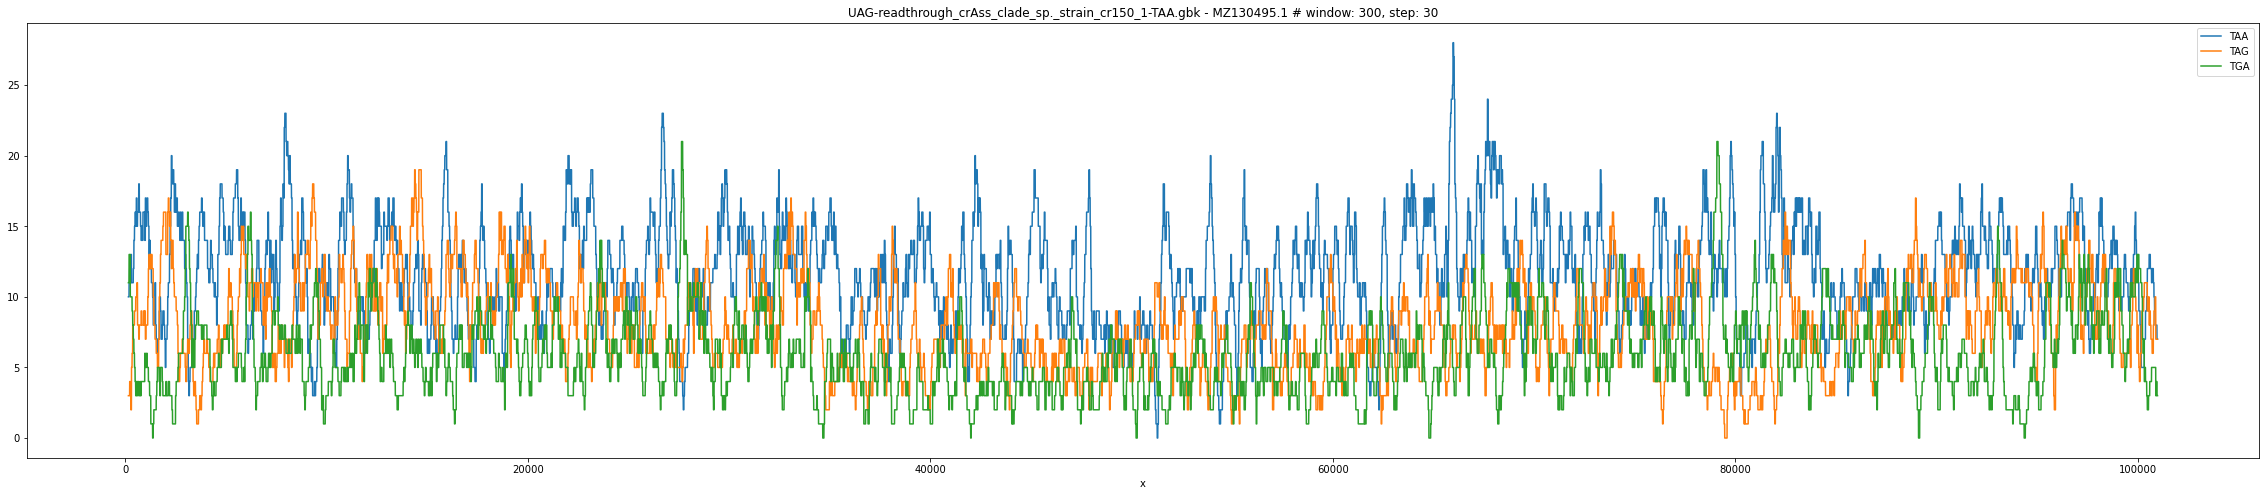

In [ ]:
infiles = glob.glob('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1*.gbk')
for infile in infiles[:1]:
    print("=== Working on file {} ===".format(infile))
    for record in parse_genbank(infile):
        # output files
        df_stops_file = os.path.join(outdir, '{}.{}_stops.txt'.format(os.path.basename(infile), record.id))
        df_stops_per_frame_file = os.path.join(outdir, '{}.{}_stops_per_frame.txt'.format(os.path.basename(infile), record.id))
        df_stops_plot_file = os.path.join(outdir, '{}.{}_stops.png'.format(os.path.basename(infile), record.id))
        df_stops_per_frame_plot_file = os.path.join(outdir, '{}.{}_stops_per_frame.png'.format(os.path.basename(infile), record.id))
        # data
        window = 300
        step = 30

        print(" = Getting overall distribution of stops")
        df = get_distribution_of_stops(record, window, step)
        df.plot(
            x="x", 
            y=df.columns[1:], 
            figsize=(40, 8), 
            legend=True, 
            title="{} - {} # window: {}, step: {}".format(os.path.basename(infile), record.id, window, step)
        )
        print("Writing distribution of stops to {}".format(df_stops_file))
        write_df_to_artemis(df, df_stops_file)
        print("Writing plot of the distribution to {}".format(df_stops_plot_file))
        plt.savefig(df_stops_plot_file)

        print(" = Getting distribution of stops per frame")
        df = get_distribution_of_stops_per_frame(record, window, step)
        df.plot(
            x="x", 
            y=df.columns[1:], 
            figsize=(40, 8), 
            legend=True, 
            title="{} - {} # window: {}, step: {}".format(os.path.basename(infile), record.id, window, step)
        )
        print("Writing distribution of stops to {}".format(df_stops_file))
        write_df_to_artemis(df, df_stops_per_frame_file)
        print("Writing plot of the distribution to {}".format(df_stops_plot_file))
        plt.savefig(df_stops_per_frame_plot_file)